## No Consecutive Sad Days: Markov Mood Model with Taboo Transitions

In [2]:
import numpy as np
import pandas as pd

# Define the original transition matrix P
P = np.array([
    [0.6, 0.4],  # From Happy
    [0.3, 0.7]   # From Sad
])

# Define the taboo transition matrix: no two consecutive Sad days (set P(S→S) = 0)
P_taboo = np.array([
    [0.6, 0.4],
    [0.3, 0.0]
])

# Create labeled DataFrames for visualization
states = ['Happy', 'Sad']
df_P = pd.DataFrame(P, columns=states, index=states)
df_P_taboo = pd.DataFrame(P_taboo, columns=states, index=states)

# Print original transition matrix
print("Original Transition Matrix P:")
print(df_P, end="\n\n")

# Print taboo transition matrix
print("Taboo Transition Matrix (No SS allowed):")
print(df_P_taboo, end="\n\n")

# Initial state vector: on Tuesday, the boss is Happy
v = np.array([1, 0])  # [Happy, Sad]

# Compute P_taboo^3 to represent 3 transitions (Tue→Wed→Thu→Fri)
P_taboo_3 = np.linalg.matrix_power(P_taboo, 3)

# Compute the resulting state vector after 3 steps
final_prob_vector = v @ P_taboo_3

# Create a summary DataFrame for the result
summary_df = pd.DataFrame({
    "State": states,
    "Probability on Friday": final_prob_vector
})

# Print the final probability distribution
print("Probability Distribution on Friday (No SS Allowed):")
print(summary_df, end="\n\n")

# Print the specific probability of being Happy on Friday
print(f"Probability that boss is Happy on Friday (no two consecutive Sad days): {final_prob_vector[0]}")

Original Transition Matrix P:
       Happy  Sad
Happy    0.6  0.4
Sad      0.3  0.7

Taboo Transition Matrix (No SS allowed):
       Happy  Sad
Happy    0.6  0.4
Sad      0.3  0.0

Probability Distribution on Friday (No SS Allowed):
   State  Probability on Friday
0  Happy                  0.360
1    Sad                  0.192

Probability that boss is Happy on Friday (no two consecutive Sad days): 0.36


## Graph Visualization

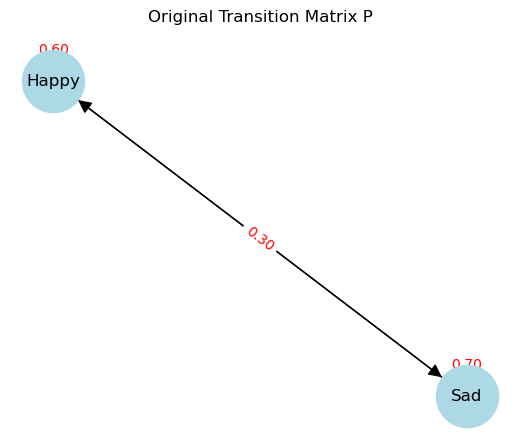

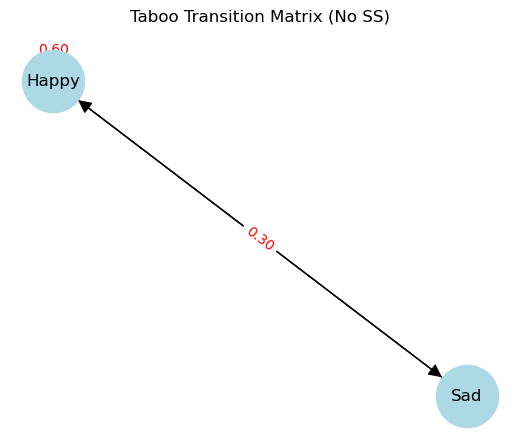

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_markov_chain(P, title, states=['Happy', 'Sad']):
    G = nx.DiGraph()
    for i, from_state in enumerate(states):
        for j, to_state in enumerate(states):
            prob = P[i, j]
            if prob > 0:
                G.add_edge(from_state, to_state, weight=prob)

    pos = nx.spring_layout(G, seed=42)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    edge_labels = {k: f'{v:.2f}' for k, v in edge_labels.items()}

    plt.figure(figsize=(5, 4))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12, arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.title(title)
    plt.show()

# Original and taboo matrices
P = np.array([
    [0.6, 0.4],
    [0.3, 0.7]
])

P_taboo = np.array([
    [0.6, 0.4],
    [0.3, 0.0]
])

# Draw both graphs
draw_markov_chain(P, "Original Transition Matrix P")
draw_markov_chain(P_taboo, "Taboo Transition Matrix (No SS)")